## Imported Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("PEA01.20231009T211012.csv")

In [3]:
df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [4]:
df.columns

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')

In [5]:
df.shape

(5994, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  5994 non-null   object 
 1   Year             5994 non-null   int64  
 2   Age Group        5994 non-null   object 
 3   Sex              5994 non-null   object 
 4   UNIT             5994 non-null   object 
 5   VALUE            5880 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 281.1+ KB


In [7]:
df.isnull()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
5989,False,False,False,False,False,False
5990,False,False,False,False,False,False
5991,False,False,False,False,False,False
5992,False,False,False,False,False,False


### Scenario: Suppose you want to investigate whether there is an association between the "Sex" column (which has two categories: male and female) and a certain event, and you want to use the Binomial distribution to model this situation.

Hypothesis:
You hypothesize that there is a 20% chance that a person of a certain sex (e.g., male) will experience the event in a given year.

Steps to Analyze with Binomial Distribution:

Calculate the probability of success (p) for the Binomial distribution based on your hypothesis (e.g., p = 0.20).
Define the number of trials (n) as the total number of rows in your dataset (5994).
Use the Binomial distribution to calculate the probability mass function (PMF) for each value of k (number of successes) in the range from 0 to n. You can use the scipy.stats.binom.pmf function for this.

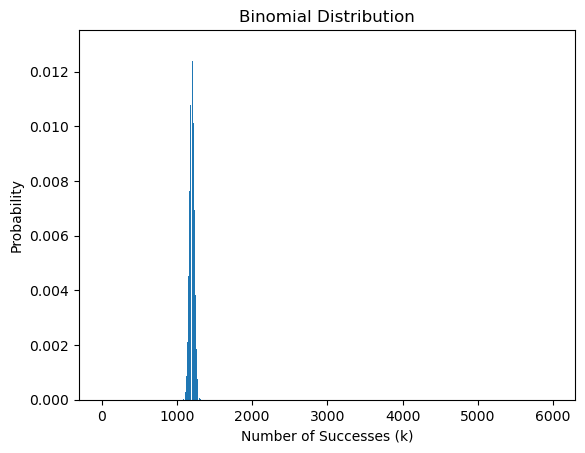

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Hypothesis
p = 0.20

# Total number of trials (rows in the dataset)
n = 5994

# Calculate PMF for each value of k (0 to n)
k_values = np.arange(0, n+1)
pmf = binom.pmf(k_values, n, p)

# Visualize the Binomial distribution
plt.bar(k_values, pmf)
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.show()


Steps to Analyze with Poisson Distribution:

Calculate the event rate (λ) as the average number of events per year. You can calculate this based on the dataset.
Use the Poisson distribution to calculate the PMF for each value of k (number of events) in a given year. You can use the scipy.stats.poisson.pmf function for this.
Here's some Python code to perform this analysis:

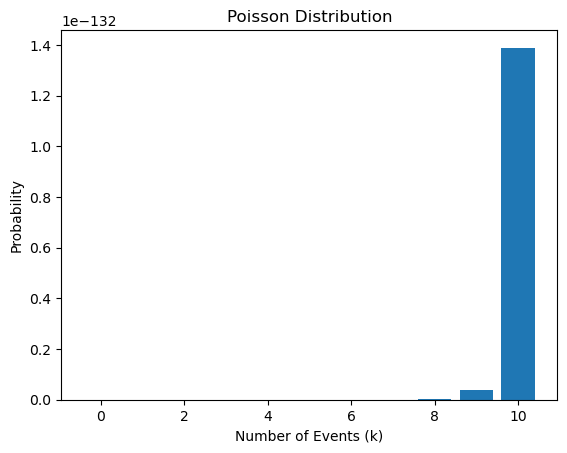

In [10]:
from scipy.stats import poisson

# Calculate the event rate (λ) based on your dataset
event_rate = df['VALUE'].mean()

# Define a range for k values (e.g., 0 to 10 events in a year)
k_values = np.arange(0, 11)

# Calculate PMF for each value of k
pmf = poisson.pmf(k_values, event_rate)

# Visualize the Poisson distribution
plt.bar(k_values, pmf)
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.show()


In [11]:
# Calculate basic descriptive statistics for the 'VALUE' column
descriptive_stats = df['VALUE'].describe()
print(descriptive_stats)

count    5880.000000
mean      347.001088
std       601.822682
min         5.500000
25%        79.475000
50%       151.700000
75%       307.725000
max      5281.600000
Name: VALUE, dtype: float64


In [12]:
import pandas as pd

# Assuming you have your DataFrame df
mean_value = df['VALUE'].mean()
std_value = df['VALUE'].std()

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_value}")


Mean: 347.0010884353742
Standard Deviation: 601.8226824979944


Visualize the Data: Create a histogram or density plot to visualize the distribution of the "VALUE" column. This helps you visually assess whether the data appears to be roughly Normal or if there are deviations from Normality.

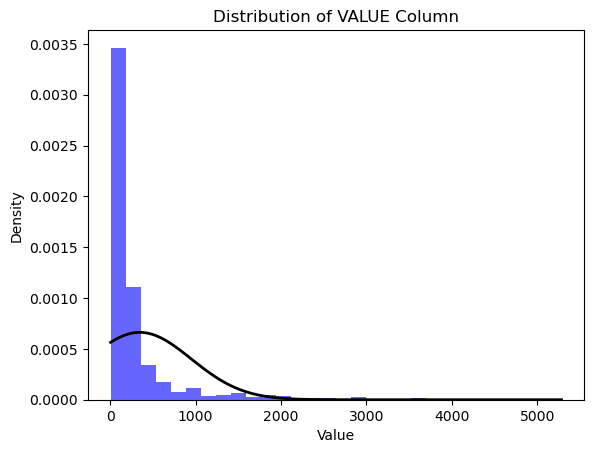

In [13]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(df['VALUE'], bins=30, density=True, alpha=0.6, color='b')

# Plot the Normal distribution for comparison
from scipy.stats import norm
x = np.linspace(df['VALUE'].min(), df['VALUE'].max(), 100)
pdf = norm.pdf(x, loc=mean_value, scale=std_value)
plt.plot(x, pdf, 'k-', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of VALUE Column')
plt.show()


In [14]:
# Calculate the correlation between 'Year' and 'VALUE'
correlation = df['Year'].corr(df['VALUE'])
print(f'Correlation between Year and VALUE: {correlation}')

Correlation between Year and VALUE: 0.11000544744512805


#### Freqvency analysis

In [15]:
# Calculate the frequency of each unique value in the 'Age Group' column
age_group_counts = df['Age Group'].value_counts()
print(age_group_counts)

Under 1 year         222
40 - 44 years        222
85 years and over    222
80 - 84 years        222
75 - 79 years        222
70 - 74 years        222
65 years and over    222
65 - 69 years        222
60 - 64 years        222
55 - 59 years        222
50 - 54 years        222
45 - 64 years        222
45 - 49 years        222
35 - 39 years        222
0 - 4 years          222
30 - 34 years        222
25 - 44 years        222
25 - 29 years        222
20 - 24 years        222
15 years and over    222
15 - 24 years        222
15 - 19 years        222
10 - 14 years        222
5 - 9 years          222
1 - 4 years          222
0 - 14 years         222
All ages             222
Name: Age Group, dtype: int64


## Statistics Test

### Hypothesis Testing (chi-test)

In [16]:
from scipy.stats import chi2_contingency

# Perform a chi-square test of independence between 'Age Group' and 'Sex'
contingency_table = pd.crosstab(df['Age Group'], df['Sex'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')


Chi-square statistic: 0.0
P-value: 1.0
